<a href="https://colab.research.google.com/github/wlgns222/roka-ai-study/blob/main/deep-learning-from-scratch-vol1/Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ch4. 신경망 학습**

## 4.1 데이터

## 4.2 손실함수

- 최적의 매개변수를 값을 탐색하는 지표
- 임의의 함수를 사용할 수도 있지만 일반적으로 오차제곱합 또는 엔트로피 오차를 사용

### 4.2.1 오차제곱합(SSE)

주로 **회귀** 문제에서 사용되는 손실함수

$$E = \frac{1}{2} \sum_{k} (y_k - t_k)^2$$

- $y_k$: 신경망의 출력 (예측값)
- $t_k$: 정답 레이블 (Target)
- $k$: 데이터의 차원 수

In [ ]:
import numpy as np

#오차제곱합(SSE)
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

#정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#2가 가장 확률 높다고 추정
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y1), np.array(t)))

#7이 가장 확률 높다고 추정
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


=> 오차제곱합 기준으로 첫번째 추정결과가 정답에 가까울 것이라 판단

### 4.2.2 교차 엔트로피 오차(CEE)




주로 딥러닝의 **분류** 문제에서 표준으로 사용되는 손실 함수

$$E = -\sum_{k} t_k \ln y_k$$
- $t_k$는 원-핫 인코딩(One-hot encoding) 형태 (정답인 인덱스만 1, 나머지는 0)
- 실제 식은 정답일 때의 출력값($y_{correct}$)에 대해서만 $E = -\ln y_{correct}$를 계산

In [ ]:
import numpy as np

def cross_entropy_error(y, t):
  delta = 1e-7
  #delta는 아주 작은 값
  #y가 0이면 log(0)이 되어 -inf 를 방지
  return -np.sum(t * np.log(y + delta))


#정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#2가 가장 확률 높다고 추정
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

#7이 가장 확률 높다고 추정
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


=> 교차 엔트로피 값이 작은 (0.51...) 이 정답일 가능성이 높다 판단

### 4.2.3 미니배치 학습

MNIST 데이터셋 중 N장의 데이터를 추출 후 손실함수를 계산하는 코드 작성

**미니배치 교차 엔트로피 수식**


$$E = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk} \ln y_{nk}$$

In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git
%cd deep-learning-from-scratch

import numpy as np
from dataset.mnist import load_mnist

#1 데이터로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#2. 미니배치 추출
train_size = x_train.shape[0]
batch_size = 100

batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#3.교차 엔트로피 구현 (정답 레이블이 원-핫 인코딩일 경우)
def cross_entropy_error(y,t) :
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    # y가 1차원일때 데이터 형상을 바꿈
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

def cross_entropy_error(y,t) :
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    # y가 1차원일때 데이터 형상을 바꿈

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


## 4.3 수치 미분

###4.3.1 미분

In [ ]:
#나쁜 예시

def numerical_diff(f,x):
  h = 1e-50
  return (f(x+h) - f(x)) / h

1. 반올림 오차
    - 1e - 50 : 소수점 아래 0이 50개. 따라서 소수점 아래가 생략되어 최종 결과 계산에 오차가 생김

2. 함수 f의 차분
    - 해당 구현은 f(x+h) 와 f(x) 사이 기울기. 따라서 진정한 의미의 미분이 아님

In [ ]:
#두 개선점을 적용한 수치 미분
def numerical_diff(f, x) :
  h = 1e-4
  return (f(x+h)-f(x-h))/2*h

- 이 차분은 x를 중심으로 그 전후를 차분한다는 의미에서 **중심 차분** 혹은 **중앙 차분**(Central Difference) 이라고 함

여기에서처럼 아주 작은 차분으로 미분하는 것을 **수치 미분**이라고 한다.

###4.3.2 수치 미분의 예

$f(x) = 0.01x^2 + 0.1x$

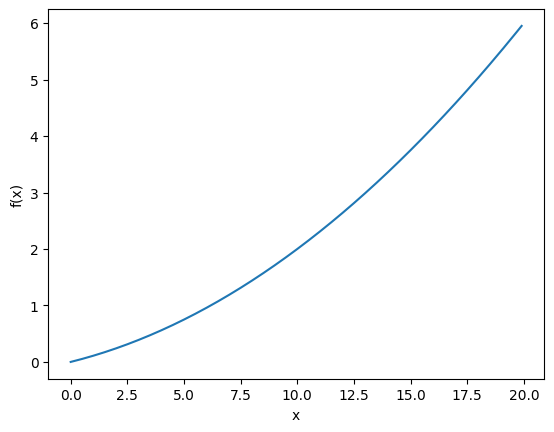

0.1999999999990898
0.2999999999986347


In [ ]:
def function1(x) :
  return 0.01*x**2 + 0.1*x

def numerical_diff(f, x) :
  h = 1e-4
  return (f(x+h)-f(x-h))/(2*h)

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

print(numerical_diff(function1, 5))
print(numerical_diff(function1, 10))

### 4.3.3 편미분

**편미분이란**
1. 수학적 정의 - 여러 변수를 가진 함수에서 특정 변수 하나에 대하여 미분하는 것
2. 기하학적 의미 - 3차원 곡면의 특정 지점에서 **축방향으로만 움직였을 때 경사**

$f(x_0, x_1) = x_0^2 + x_1^2$

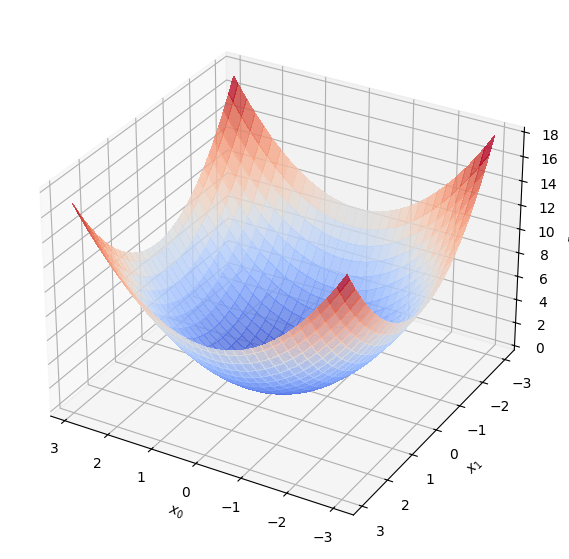

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def function_2(x0, x1):
    return x0**2 + x1**2

x0 = np.arange(-3.0, 3.0, 0.1)
x1 = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x0, x1)
Z = function_2(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', antialiased=False, alpha=0.8)

ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$f(x)$')

ax.view_init(elev=30, azim=120)

plt.show()


##4.4 기울기

아래와 같이 편미분을 동시에 계산하는 것이 가능하다.

In [ ]:
import numpy as np

def numerical_gradient(f, x) :
  h = 1e-4 #0.0001
  grad = np.zeros_like(x) #x와 같은 형상의 배열 생성

  for idx in range(x.size):
    tmp_val = x[idx]

    x[idx] = tmp_val+h
    fxh1 = f(x)

    x[idx] = tmp_val -h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

### 4.4.1 경사 하강법

최적의 매개변수 : 손실 함수가 최솟값이 될때의 매개변수 값

-> 기울기를 이용하여 함수의 최솟값을 찾으려는 기법이 **경사법**

<br>

**경사법 (경사하강법)** : 기울기를 나침반 삼아 최저점을 향해  이동하는 방식

$$x_{new} = x_{old} - \eta \frac{\partial f}{\partial x}$$

<br>

기울기 : 현재 위치에서 함수값이 커지는 방향을 가리킴

$$\frac{\partial f}{\partial x}$$

학습률($η$) : 갱신하는 양. 한 걸음의 크기

**문제 : 경사법으로 $f(x_0, x_1) = x_0^2 + x_1^2$ 의 최솟값을 구하라**

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
  #lr : 학습률 / step_num : 반복 횟수
  x = init_x

  for i in range(step_num) :
    grad = numerical_gradient(f, x) #함수의 기울기 구하기
    x -= lr * grad

  return x

def function_2(x):
    return x[0]**2 + x[1]**2
def numerical_gradient(f, x) :
  h = 1e-4 #0.0001
  grad = np.zeros_like(x) #x와 같은 형상의 배열 생성

  for idx in range(x.size):
    tmp_val = x[idx]

    x[idx] = tmp_val+h
    fxh1 = f(x)

    x[idx] = tmp_val -h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad


init_x = np.array([-3.0, 4.0])
result1 = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
print(f"최종 결과: {result1}")

#학습률이 너무 큰 예:
init_x = np.array([-3.0, 4.0])
result2 = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)
print(f"최종 결과: {result2}")

#학습률이 너무 작은 예:
init_x = np.array([-3.0, 4.0])
result3 = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)
print(f"최종 결과: {result3}")

최종 결과: [-6.11110793e-10  8.14814391e-10]
최종 결과: [-2.58983747e+13 -1.29524862e+12]
최종 결과: [-2.99999994  3.99999992]


### 4.4.2 신경망에서의 기울기

1. 신경망에서의 기울기

  - 손실함수에 대한 가중치의 편미분
  - 가중치가 2X3 행렬이라면, 기울기 행렬 또한 2X3 행렬
  $$W = \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}, \quad \frac{\partial L}{\partial W} = \begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\ \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} \end{pmatrix}$$

<br>

  ---

2. 신경망 클래스 구현

In [22]:
import numpy as np

# 모델이 낸 확률과 실제 정답 사이의 손실을 계산
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

# 기울기를 계산
def numerical_gradient(f, x) :
  h = 1e-4 #0.0001
  grad = np.zeros_like(x) #x와 같은 형상의 배열 생성

  # 다차원 배열의 모든 원소를 순회하는 반복자 설정 by Gemini
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    idx = it.multi_index
    tmp_val = x[idx]

    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)

    x[idx] = tmp_val # 값 복원
    it.iternext()

  return grad

# 신경망의 계산 결과를 확률로 바꾸어줌
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

#신경망
class simpleNet :
  def __init__(self) : # 가중치(W)라는 지식을 무작위로 부여
    self.W = np.random.randn(2,3)

  def predict(self, x): # 입력값 x 에 가중치 W를 곱하여 결과를 예측
    return np.dot(x, self.W)

  def loss(self, x, t): #예측을 하고, 확률로 바꾼뒤, 정답과 비교하여 손실을 계산함
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

net = simpleNet()
print("가중치(W) \n", net.W, "\n")
x = np.array([0.6, 0.9]) #입력값

p=net.predict(x)
print("결과 예측 \n", p ,"\n")
print("최댓값의 인덱스 : ", np.argmax(p), "\n") #모델이 현재 어떤 클래스를 정답으로 밀고 있는지 확인

t = np.array([0, 0, 1]) #정답 레이블
print("손실계산 : ", net.loss(x, t))

f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print("\n기울기 \n", dW)


가중치(W) 
 [[-0.130113   -0.99441091  0.84491096]
 [ 1.68036847  0.54592903 -1.03764586]] 

결과 예측 
 [ 1.43426383 -0.10531042 -0.42693469] 

최댓값의 인덱스 :  0 

손실계산 :  2.1759781307048476

기울기 
 [[ 0.43796907  0.09393227 -0.53190134]
 [ 0.6569536   0.14089841 -0.79785201]]
